# Support Vector Machine

### What is a *Hyperplane*?

In a $k$-dimensional space, a [hyperplane](https://en.wikipedia.org/wiki/Hyperplane) is a flat affine subspace of dimension $k-1$. For instance, in two dimensions, a hyperplane is a flat one-dimensional subspace - in other words, a line. In three dimensions, a hyperplane is a flat two-dimensional subspace - that is, a plane. In $k>3$ dimensions, it can be hard to visualize a hyperplane, but the notion of a $(k-1)$ -dimensional flat subspace still applies.

The mathematical definition of a hyperplane is quite simple. In two dimensions, a hyperplane is defined by the equation

$$
\beta_{0}+\beta_{1} X_{1}+\beta_{2} X_{2}=0
$$

for parameters $\beta_{0}, \beta_{1}$, and $\beta_{2}$. When we say that the above equation "defines" the hyperplane, we mean that any $X=\left(X_{1}, X_{2}\right)^{\prime}$ for which the equation holds is a point on the hyperplane. Note this equation is simply the equation of a line, since indeed in two dimensions a hyperplane is a line. Clearly in th multidimensional case one has

$$
\begin{aligned}
\beta_{0}+\beta_{1} X_{1}+\beta_{2} X_{2}+\ldots+\beta_{k} X_{k}&=0\\
\mathbf{x}^{\prime}\boldsymbol{\beta}&=0,
\end{aligned}
$$

and this defines a $k$-dimensional hyperplane in the sense that if $X=[X_1,X_2,\ldots,X_k]^{\prime}\in\mathbb{R}^{k}$ satisfies $\mathbf{x}^{\prime}\boldsymbol{\beta}=0$, then it is said that $X$ *lies* on the hyperplane.

Now, suppose that $X$ does not satisfy $\mathbf{x}^{\prime}\boldsymbol{\beta}=0$ rather,
$$
\begin{aligned}
\beta_{0}+\beta_{1} X_{1}+\beta_{2} X_{2}+\ldots+\beta_{k} X_{k}&>0\\
\mathbf{x}^{\prime}\boldsymbol{\beta}&>0.
\end{aligned}
$$

Then this tells us that $X$ lies to one side of the hyperplane. On the other hand, if
$$
\begin{aligned}
\beta_{0}+\beta_{1} X_{1}+\beta_{2} X_{2}+\ldots+\beta_{k} X_{k}&<0\\
\mathbf{x}^{\prime}\boldsymbol{\beta}&<0.
\end{aligned}
$$
then $X$ lies on the other side of the hyperplane. So we can think of the hyperplane as dividing p-dimensional space into two halves. One can easily determine on which side of the hyperplane a point lies by simply calculating the sign of the left hand side of $\mathbf{x}^{\prime}\boldsymbol{\beta}$.

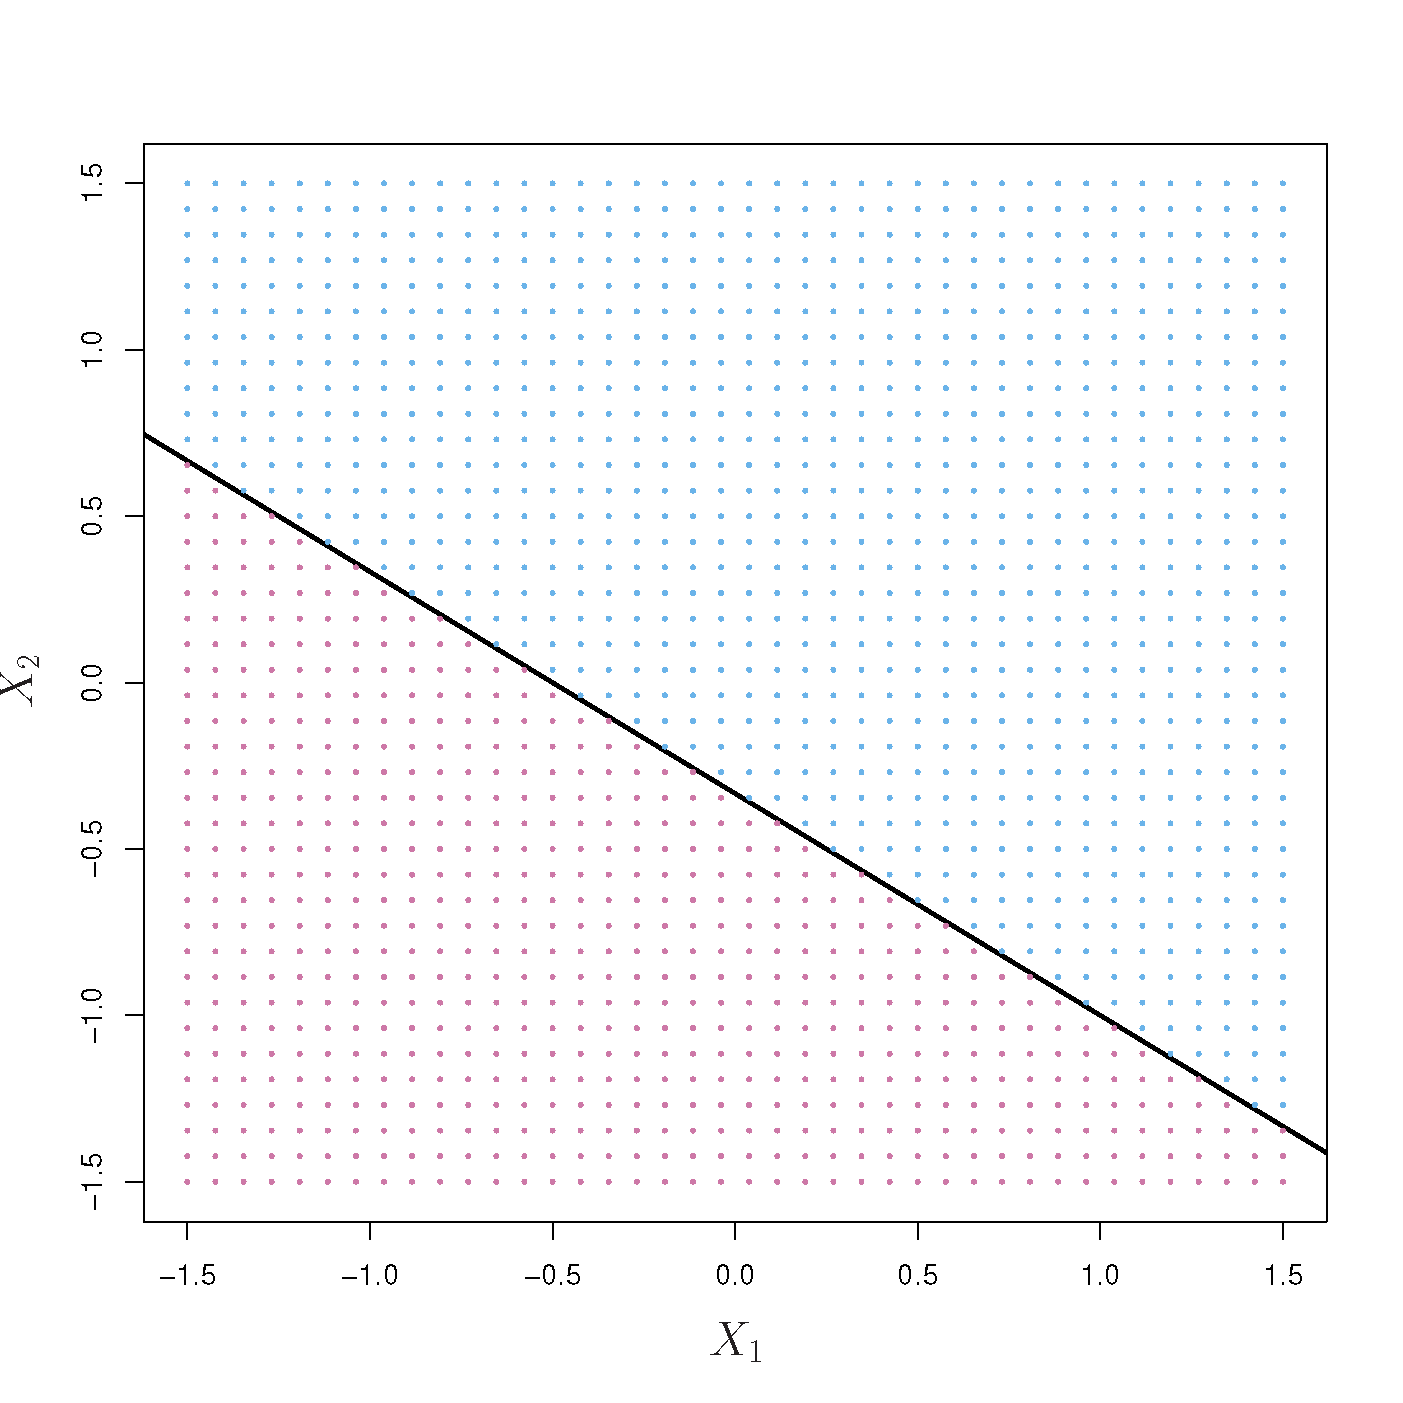
👆🏼 The hyperplane $1+2 X_{1}+3 X_{2}=0$ is shown. The blue region is
the set of points for which $1+2 X_{1}+3 X_{2}>0$, and the purple region is the set of
points for which $1+2 X_{1}+3 X_{2}<0$.

In [1]:
## installing the 'wooldridge' package if not previously installed
if (!require(wooldridge)) install.packages('wooldridge')

data(mroz)

##  Obs:   753

##  1. inlf                     =1 if in labor force, 1975
##  2. hours                    hours worked, 1975
##  3. kidslt6                  # kids < 6 years
##  4. kidsge6                  # kids 6-18
##  5. age                      woman's age in yrs
##  6. educ                     years of schooling
##  7. wage                     estimated wage from earns., hours
##  8. repwage                  reported wage at interview in 1976
##  9. hushrs                   hours worked by husband, 1975
## 10. husage                   husband's age
## 11. huseduc                  husband's years of schooling
## 12. huswage                  husband's hourly wage, 1975
## 13. faminc                   family income, 1975
## 14. mtr                      fed. marginal tax rate facing woman
## 15. motheduc                 mother's years of schooling
## 16. fatheduc                 father's years of schooling
## 17. unem                     unem. rate in county of resid.
## 18. city                     =1 if live in SMSA (Standard Metropolitan Statistical Area)
## 19. exper                    actual labor mkt exper
## 20. nwifeinc                 (faminc - wage*hours)/1000
## 21. lwage                    log(wage)
## 22. expersq                  exper^2

## specifying the outcome variable (y) and original predictors (X)
outcome <- "inlf"
predictors <- c("kidslt6", "kidsge6", "age", "educ","exper", "hushrs", "husage", "huseduc","huswage", 
    "nwifeinc","mtr","unem","city")

## creating local copy with relevant variables
data("mroz", package = "wooldridge")
mroz.copy <- subset(mroz, select = c(outcome, predictors))
mroz.copy$inlf <- as.factor(mroz.copy$inlf)

head(mroz.copy,10)

Loading required package: wooldridge


inlf kidslt6 kidsge6 age educ exper hushrs husage huseduc huswage nwifeinc 
1  1    1       0       32  12   14    2708   34     12       4.0288 10.910060
2  1    0       2       30  12    5    2310   30      9       8.4416 19.499981
3  1    1       3       35  12   15    3072   40     12       3.5807 12.039910
4  1    0       3       34  12    6    1920   53     10       3.5417  6.799996
5  1    1       2       31  14    7    2000   32     12      10.0000 20.100058
6  1    0       0       54  12   33    1040   57     11       6.7106  9.859054
7  1    0       2       37  16   11    2670   37     12       3.4277  9.152048
8  1    0       0       54  12   35    4120   53      8       2.5485 10.900038
9  1    0       2       48  12   24    1995   52      4       4.2206 17.305000
10 1    0       2       39  12   21    2100   43     12       5.7143 12.925000
   mtr    unem city
1  0.7215  5.0 0   
2  0.6615 11.0 1   
3  0.6915  5.0 0   
4  0.7815  5.0 0   
5  0.6215  9.5 1   
6  0.6915  7.5 1   
7  0.6915  5.0 0   
8  0.6915  5.0 0   
9  0.7515  3.0 0   
10 0.6915  5.0 0

In [2]:
## installing the 'tidyverse' package if not previously installed
if (!require(tidyverse)) install.packages('tidyverse')

## installing the 'caret' package if not previously installed
if (!require(caret)) install.packages('caret')

## split the data into training and test set
set.seed(2020)
training.samples <- mroz.copy$inlf %>% 
  createDataPartition(p = 0.75, list = FALSE)
train.data  <- mroz.copy[training.samples, ]
test.data <- mroz.copy[-training.samples, ]

Loading required package: tidyverse
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: caret
Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift



In [4]:
set.seed(2020)
model <- train(inlf~.,data=train.data,method="svmLinear",
              trControl=trainControl("cv",number=10),
              preProcess=c("center","scale")
              )

In [5]:
predicted.classes <- model %>% predict(test.data)
## assessing model accuracy
confusionMatrix(data = factor(test.data$inlf,labels=c("no","yes")),
                reference = factor(predicted.classes,labels=c("no","yes")))

Confusion Matrix and Statistics

          Reference
Prediction no yes
       no  60  21
       yes 25  82
                                         
               Accuracy : 0.7553         
                 95% CI : (0.6875, 0.815)
    No Information Rate : 0.5479         
    P-Value [Acc > NIR] : 3.19e-09       
                                         
                  Kappa : 0.5041         
                                         
 Mcnemar's Test P-Value : 0.6583         
                                         
            Sensitivity : 0.7059         
            Specificity : 0.7961         
         Pos Pred Value : 0.7407         
         Neg Pred Value : 0.7664         
             Prevalence : 0.4521         
         Detection Rate : 0.3191         
   Detection Prevalence : 0.4309         
      Balanced Accuracy : 0.7510         
                                         
       'Positive' Class : no             
                                         

Warning message:
"model fit failed for Fold01: C=0.0000 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02: C=0.0000 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03: C=0.0000 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04: C=0.0000 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05: C=0.0000 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06: C=0.0000 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07: C=0.0000 Error in .local(x, ...) : 
  No Suppor

C        
8 0.7368421

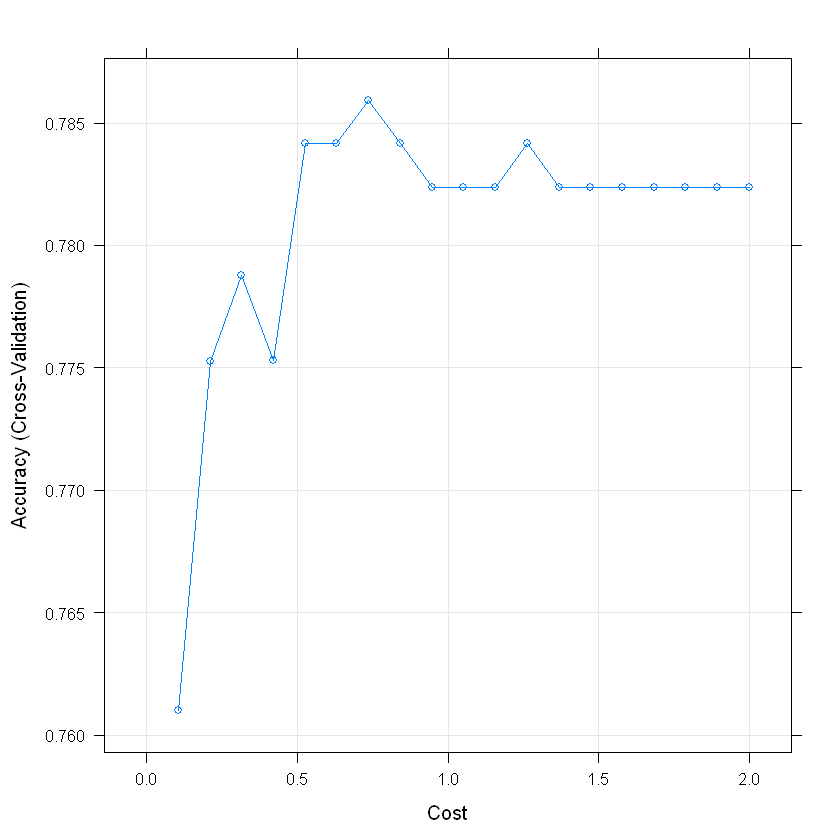

In [6]:
set.seed(2020)
model <- train(inlf~.,data=train.data,method="svmLinear",
              trControl=trainControl("cv",number=10),
              tuneGrid=expand.grid(C=seq(0,2,length=20)),
              preProcess=c("center","scale")
              )
plot(model)
model$bestTune

In [7]:
predicted.classes <- model %>% predict(test.data)
## assessing model accuracy
confusionMatrix(data = factor(test.data$inlf,labels=c("no","yes")),
                reference = factor(predicted.classes,labels=c("no","yes")))

Confusion Matrix and Statistics

          Reference
Prediction no yes
       no  60  21
       yes 26  81
                                          
               Accuracy : 0.75            
                 95% CI : (0.6818, 0.8102)
    No Information Rate : 0.5426          
    P-Value [Acc > NIR] : 3.498e-09       
                                          
                  Kappa : 0.494           
                                          
 Mcnemar's Test P-Value : 0.5596          
                                          
            Sensitivity : 0.6977          
            Specificity : 0.7941          
         Pos Pred Value : 0.7407          
         Neg Pred Value : 0.7570          
             Prevalence : 0.4574          
         Detection Rate : 0.3191          
   Detection Prevalence : 0.4309          
      Balanced Accuracy : 0.7459          
                                          
       'Positive' Class : no              
                                 

In [8]:
set.seed(24)
model <- train(inlf~.,data=train.data,method="svmRadial",
              trControl=trainControl("cv",number=10),
              preProcess=c("center","scale"),
              tuneLength=10
              )
model$bestTune
predicted.classes <- model %>% predict(test.data)
## assessing model accuracy
confusionMatrix(data = factor(test.data$inlf,labels=c("no","yes")),
                reference = factor(predicted.classes,labels=c("no","yes")))

sigma      C  
2 0.05337645 0.5

Confusion Matrix and Statistics

          Reference
Prediction no yes
       no  53  28
       yes 24  83
                                         
               Accuracy : 0.7234         
                 95% CI : (0.6536, 0.786)
    No Information Rate : 0.5904         
    P-Value [Acc > NIR] : 0.0001023      
                                         
                  Kappa : 0.4326         
                                         
 Mcnemar's Test P-Value : 0.6773916      
                                         
            Sensitivity : 0.6883         
            Specificity : 0.7477         
         Pos Pred Value : 0.6543         
         Neg Pred Value : 0.7757         
             Prevalence : 0.4096         
         Detection Rate : 0.2819         
   Detection Prevalence : 0.4309         
      Balanced Accuracy : 0.7180         
                                         
       'Positive' Class : no             
                                         

In [9]:
set.seed(2020)
model <- train(inlf~.,data=train.data,method="svmPoly",
              trControl=trainControl("cv",number=10),
              preProcess=c("center","scale"),
              tuneLength=4
              )
model$bestTune
predicted.classes <- model %>% predict(test.data)
## assessing model accuracy
confusionMatrix(data = factor(test.data$inlf,labels=c("no","yes")),
                reference = factor(predicted.classes,labels=c("no","yes")))

degree scale C  
14 1      1     0.5

Confusion Matrix and Statistics

          Reference
Prediction no yes
       no  60  21
       yes 27  80
                                          
               Accuracy : 0.7447          
                 95% CI : (0.6761, 0.8054)
    No Information Rate : 0.5372          
    P-Value [Acc > NIR] : 3.815e-09       
                                          
                  Kappa : 0.484           
                                          
 Mcnemar's Test P-Value : 0.4705          
                                          
            Sensitivity : 0.6897          
            Specificity : 0.7921          
         Pos Pred Value : 0.7407          
         Neg Pred Value : 0.7477          
             Prevalence : 0.4628          
         Detection Rate : 0.3191          
   Detection Prevalence : 0.4309          
      Balanced Accuracy : 0.7409          
                                          
       'Positive' Class : no              
                                 